# Heart Disease Classifier

![photo](data/heart.jpg)

In [1]:
import os
from zipfile import ZipFile
import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split

DATA_PATH = os.path.join('data', 'heart_disease_dataset.zip')
EXTRACT_PATH = os.path.join('data')

In [2]:
def unzip_file(data_path=DATA_PATH, extract_path=EXTRACT_PATH):
    if not os.path.isfile(data_path):
        return "File does not exist"
    with ZipFile(data_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        return 'File extracted'

In [3]:
unzip_file()

'File extracted'

In [4]:
heart_disease_df = pd.read_csv(os.path.join('data', 'heart_failure_clinical_records_dataset.csv'))
heart_disease_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [5]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
heart_disease_df[['age', 'platelets']] = heart_disease_df[['age', 'platelets']].astype(np.int64)

In [7]:
heart_disease_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


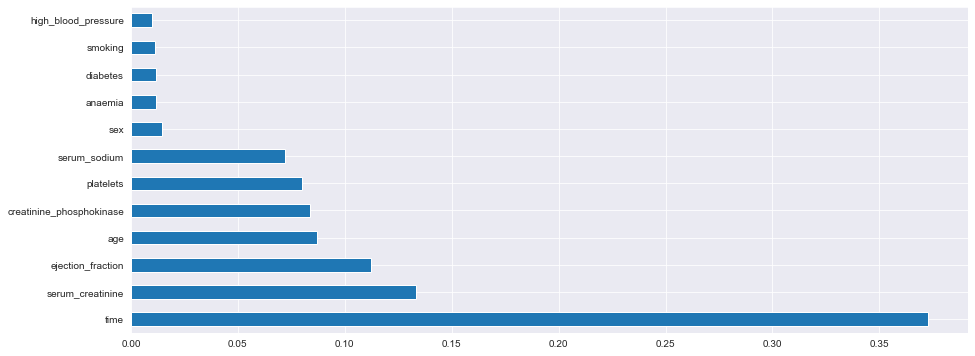

In [8]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")

X = heart_disease_df.drop('DEATH_EVENT', axis=1)
y = heart_disease_df['DEATH_EVENT']

model = RandomForestClassifier(random_state=69)
model.fit(X,y)

importance = model.feature_importances_
importance_series = pd.Series(importance, index=X.columns)
importance_series.nlargest(12).plot(kind='barh')

plt.show()

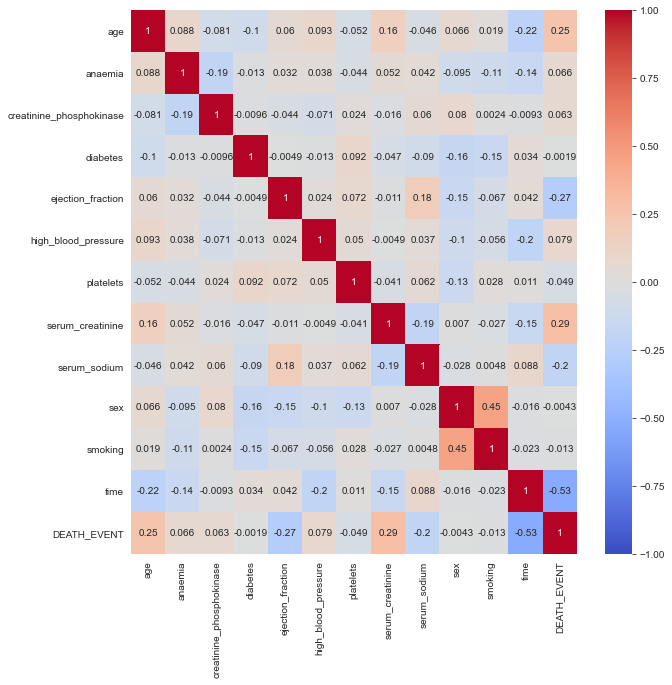

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_disease_df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [10]:
features = ['time','ejection_fraction', 'serum_creatinine']
X = heart_disease_df[features]
# X = heart_disease_df.drop("DEATH_EVENT", axis=1)
y = heart_disease_df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

In [11]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [12]:
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

In [13]:
def results(y_test,model, model_name=None):
    accuracy = round(accuracy_score(y_test, model),4)
    precision = round(precision_score(y_test,model),4)
    recall = round(recall_score(y_test,model),4)
    f1 = round(f1_score(y_test,model),4)
    
    if model_name:
        accuracy_dict[model_name] = accuracy
        precision_dict[model_name] = precision
        recall_dict[model_name] = recall
        f1_dict[model_name] = f1
    
    print(confusion_matrix(y_test, model))
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1_score: {f1}")

In [14]:
log_reg = LogisticRegression(solver='lbfgs')
score = cross_val_score(log_reg, X_train_sc, y_train, cv=5)
score.mean()

0.8453014184397162

In [15]:
log_reg.fit(X_train_sc,y_train)
log_cross_pred = cross_val_predict(log_reg, X_test_sc, y_test, cv=5)

results(y_test,log_cross_pred, "Logistic Regression")

[[36  4]
 [ 8 12]]
accuracy: 0.8
precision: 0.75
recall: 0.6
f1_score: 0.6667


In [16]:
svc_param_grid =[
    {'C':np.linspace(0.01,1.0, num=100), 'gamma':np.arange(1,10), 'kernel':['rbf','sigmoid']}
]
svc = SVC()
svc_grid_search= GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                          'gamma': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'kernel': ['rbf', 'sigmoid']}],
             scoring='accuracy')

In [17]:
svc_params = svc_grid_search.best_params_
svc_params

{'C': 0.6900000000000001, 'gamma': 1, 'kernel': 'rbf'}

In [18]:
svc_clf = SVC(kernel=svc_params['kernel'], gamma=svc_params['gamma'], C=svc_params['C'])
svc_score = cross_val_score(svc_clf, X_train_sc, y_train, cv=5)
svc_score.mean()

0.8579787234042554

In [19]:
svc_clf.fit(X_train_sc,y_train)
svc_clf_cross_pred = cross_val_predict(svc_clf, X_test_sc, y_test, cv=5)

results(y_test,svc_clf_cross_pred, "SVC")

[[36  4]
 [ 9 11]]
accuracy: 0.7833
precision: 0.7333
recall: 0.55
f1_score: 0.6286


In [20]:
knc_param_grid =[
    {'n_neighbors':np.arange(3,10), 'leaf_size':np.arange(10,100,10)}
]
knc = KNeighborsClassifier()
knc_grid_search= GridSearchCV(knc, knc_param_grid, cv=5, scoring='accuracy')
knc_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])}],
             scoring='accuracy')

In [21]:
knc_params = knc_grid_search.best_params_
knc_params

{'leaf_size': 10, 'n_neighbors': 3}

In [22]:
knc_clf = KNeighborsClassifier(leaf_size=knc_params['leaf_size'], n_neighbors=knc_params['n_neighbors'])
knc_score = cross_val_score(knc_clf, X_train_sc, y_train, cv=5)
knc_score.mean()

0.8535460992907801

In [23]:
knc_clf.fit(X_train_sc,y_train)
knc_clf_cross_pred = cross_val_predict(knc_clf, X_test_sc, y_test, cv=5)

results(y_test,knc_clf_cross_pred, "KNeighborsClassifier")

[[34  6]
 [ 9 11]]
accuracy: 0.75
precision: 0.6471
recall: 0.55
f1_score: 0.5946


In [24]:
tree_param_grid =[
    {'max_depth':np.arange(1,10), 'min_samples_split':np.arange(2,10)}
]
tree = DecisionTreeClassifier()
tree_grid_search= GridSearchCV(tree, tree_param_grid, cv=5)
tree_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])}])

In [25]:
tree_params = tree_grid_search.best_params_
tree_params

{'max_depth': 3, 'min_samples_split': 2}

In [26]:
tree_clf = DecisionTreeClassifier(
    max_depth=tree_params['max_depth'], min_samples_split=tree_params['min_samples_split'], criterion='entropy')
tree_score = cross_val_score(tree_clf, X_train_sc, y_train, cv=5)
tree_score.mean()

0.8411347517730496

In [27]:
tree_clf.fit(X_train_sc,y_train)
tree_clf_cross_pred = cross_val_predict(tree_clf, X_test_sc, y_test, cv=5)

results(y_test, tree_clf_cross_pred, "DecisionTreeClassifier")

[[33  7]
 [ 8 12]]
accuracy: 0.75
precision: 0.6316
recall: 0.6
f1_score: 0.6154


In [28]:
bag_param_grid =[
    {'n_estimators':np.arange(100,500,100), 'max_samples':np.arange(50,200,50)}
]
bag = BaggingClassifier()
bag_grid_search= GridSearchCV(bag, bag_param_grid, cv=5)
bag_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid=[{'max_samples': array([ 50, 100, 150]),
                          'n_estimators': array([100, 200, 300, 400])}])

In [29]:
bag_params = bag_grid_search.best_params_
bag_params

{'max_samples': 100, 'n_estimators': 400}

In [30]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=300,
    max_samples=50, bootstrap=True, n_jobs=-1,
    random_state=69)
bag_score = cross_val_score(bag_clf, X_train_sc, y_train, cv=5)
bag_score.mean()

0.861968085106383

In [31]:
bag_clf.fit(X_train_sc, y_train)
bag_clf_pred = bag_clf.predict(X_test_sc)
results(y_test, bag_clf_pred, "BaggingClassifier")

[[38  2]
 [ 8 12]]
accuracy: 0.8333
precision: 0.8571
recall: 0.6
f1_score: 0.7059


In [32]:
forest_param_grid =[
    {'n_estimators':np.arange(100,500,100), 'max_leaf_nodes':np.arange(10,100,10)}
]
forest = RandomForestClassifier()
forest_grid_search= GridSearchCV(forest, forest_param_grid, cv=5)
forest_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_leaf_nodes': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'n_estimators': array([100, 200, 300, 400])}])

In [33]:
forest_params = forest_grid_search.best_params_
forest_params

{'max_leaf_nodes': 90, 'n_estimators': 400}

In [34]:
rnd_clf = RandomForestClassifier(
    n_estimators=forest_params['n_estimators'], max_leaf_nodes=forest_params['max_leaf_nodes'],
    n_jobs=-1, random_state=69
)
rnd_score = cross_val_score(rnd_clf, X_train_sc, y_train, cv=5)
rnd_score.mean()

0.861790780141844

In [35]:
rnd_clf.fit(X_train_sc, y_train)
rnd_clf_pred = rnd_clf.predict(X_test_sc)
results(y_test, rnd_clf_pred, "RandomForestClassifier")

[[37  3]
 [ 7 13]]
accuracy: 0.8333
precision: 0.8125
recall: 0.65
f1_score: 0.7222


In [36]:
ada_param_grid =[
    {'n_estimators':np.arange(100,500,100), 'learning_rate':np.arange(0.5,10.5,0.5)}
]
ada_tree = DecisionTreeClassifier(max_depth=tree_params['max_depth'], min_samples_split=tree_params['min_samples_split'])
ada = AdaBoostClassifier(ada_tree, algorithm="SAMME.R")

ada_grid_search= GridSearchCV(ada, ada_param_grid, cv=5)
ada_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3)),
             param_grid=[{'learning_rate': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
                          'n_estimators': array([100, 200, 300, 400])}])

In [37]:
ada_params = ada_grid_search.best_params_
ada_params

{'learning_rate': 2.0, 'n_estimators': 200}

In [38]:
ada_clf = AdaBoostClassifier(
    ada_tree, algorithm="SAMME.R",
    n_estimators=ada_params['n_estimators'], learning_rate=ada_params['learning_rate']
)
ada_score = cross_val_score(ada_clf, X_train_sc, y_train, cv=5)
ada_score.mean()

0.8660460992907801

In [39]:
ada_clf.fit(X_train_sc, y_train)
ada_clf_pred = ada_clf.predict(X_test_sc)
results(y_test, ada_clf_pred, "AdaBoostClassifier")

[[37  3]
 [ 8 12]]
accuracy: 0.8167
precision: 0.8
recall: 0.6
f1_score: 0.6857


In [40]:
xgb_clf = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
xgb_score = cross_val_score(xgb_clf, X_train_sc, y_train, cv=5)
xgb_score.mean()

[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Windows 10\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8494680851063829

In [41]:
xgb_clf.fit(X_train_sc, y_train)
xgb_clf_pred = xgb_clf.predict(X_test_sc)
results(y_test, xgb_clf_pred, "XGBoostClassifier")

[19:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[37  3]
 [ 8 12]]
accuracy: 0.8167
precision: 0.8
recall: 0.6
f1_score: 0.6857


In [42]:
cb_clf = CatBoostClassifier()
cb_score = cross_val_score(cb_clf, X_train_sc, y_train, cv=5)
cb_score.mean()

Learning rate set to 0.005081
0:	learn: 0.6891875	total: 55ms	remaining: 54.9s
1:	learn: 0.6849053	total: 56.5ms	remaining: 28.2s
2:	learn: 0.6803718	total: 57.6ms	remaining: 19.2s
3:	learn: 0.6764327	total: 58.6ms	remaining: 14.6s
4:	learn: 0.6722120	total: 59.8ms	remaining: 11.9s
5:	learn: 0.6686318	total: 60.9ms	remaining: 10.1s
6:	learn: 0.6648665	total: 62.1ms	remaining: 8.81s
7:	learn: 0.6611586	total: 63.2ms	remaining: 7.84s
8:	learn: 0.6577740	total: 64.7ms	remaining: 7.12s
9:	learn: 0.6535512	total: 65.7ms	remaining: 6.5s
10:	learn: 0.6496393	total: 66.6ms	remaining: 5.99s
11:	learn: 0.6458199	total: 67.7ms	remaining: 5.57s
12:	learn: 0.6425851	total: 68.7ms	remaining: 5.22s
13:	learn: 0.6391705	total: 69.7ms	remaining: 4.91s
14:	learn: 0.6352898	total: 70.7ms	remaining: 4.64s
15:	learn: 0.6316800	total: 71.8ms	remaining: 4.41s
16:	learn: 0.6287744	total: 72.7ms	remaining: 4.21s
17:	learn: 0.6247082	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6219322	total: 74.8ms	remaining: 3

170:	learn: 0.3629711	total: 243ms	remaining: 1.18s
171:	learn: 0.3622258	total: 244ms	remaining: 1.18s
172:	learn: 0.3609683	total: 245ms	remaining: 1.17s
173:	learn: 0.3601412	total: 247ms	remaining: 1.17s
174:	learn: 0.3593479	total: 248ms	remaining: 1.17s
175:	learn: 0.3580180	total: 249ms	remaining: 1.16s
176:	learn: 0.3571462	total: 250ms	remaining: 1.16s
177:	learn: 0.3560826	total: 251ms	remaining: 1.16s
178:	learn: 0.3557214	total: 252ms	remaining: 1.16s
179:	learn: 0.3548403	total: 253ms	remaining: 1.15s
180:	learn: 0.3538878	total: 254ms	remaining: 1.15s
181:	learn: 0.3531218	total: 255ms	remaining: 1.15s
182:	learn: 0.3523209	total: 256ms	remaining: 1.14s
183:	learn: 0.3517422	total: 257ms	remaining: 1.14s
184:	learn: 0.3511374	total: 258ms	remaining: 1.14s
185:	learn: 0.3504267	total: 259ms	remaining: 1.13s
186:	learn: 0.3495835	total: 260ms	remaining: 1.13s
187:	learn: 0.3488862	total: 261ms	remaining: 1.13s
188:	learn: 0.3482631	total: 262ms	remaining: 1.12s
189:	learn: 

332:	learn: 0.2782954	total: 421ms	remaining: 843ms
333:	learn: 0.2779844	total: 423ms	remaining: 843ms
334:	learn: 0.2775645	total: 424ms	remaining: 841ms
335:	learn: 0.2773296	total: 425ms	remaining: 839ms
336:	learn: 0.2769591	total: 426ms	remaining: 838ms
337:	learn: 0.2766626	total: 427ms	remaining: 837ms
338:	learn: 0.2764098	total: 428ms	remaining: 835ms
339:	learn: 0.2760526	total: 429ms	remaining: 833ms
340:	learn: 0.2756755	total: 430ms	remaining: 832ms
341:	learn: 0.2755359	total: 432ms	remaining: 831ms
342:	learn: 0.2751265	total: 433ms	remaining: 829ms
343:	learn: 0.2747529	total: 434ms	remaining: 828ms
344:	learn: 0.2745246	total: 435ms	remaining: 826ms
345:	learn: 0.2741964	total: 436ms	remaining: 824ms
346:	learn: 0.2740127	total: 437ms	remaining: 822ms
347:	learn: 0.2737001	total: 438ms	remaining: 820ms
348:	learn: 0.2735189	total: 439ms	remaining: 818ms
349:	learn: 0.2731137	total: 440ms	remaining: 817ms
350:	learn: 0.2728943	total: 441ms	remaining: 815ms
351:	learn: 

508:	learn: 0.2359836	total: 611ms	remaining: 590ms
509:	learn: 0.2358273	total: 613ms	remaining: 589ms
510:	learn: 0.2356439	total: 614ms	remaining: 587ms
511:	learn: 0.2353945	total: 615ms	remaining: 586ms
512:	learn: 0.2352769	total: 616ms	remaining: 584ms
513:	learn: 0.2352332	total: 617ms	remaining: 583ms
514:	learn: 0.2349907	total: 618ms	remaining: 582ms
515:	learn: 0.2346867	total: 619ms	remaining: 580ms
516:	learn: 0.2344869	total: 620ms	remaining: 579ms
517:	learn: 0.2341337	total: 621ms	remaining: 578ms
518:	learn: 0.2340454	total: 621ms	remaining: 576ms
519:	learn: 0.2337980	total: 622ms	remaining: 575ms
520:	learn: 0.2335676	total: 623ms	remaining: 573ms
521:	learn: 0.2332236	total: 624ms	remaining: 572ms
522:	learn: 0.2331076	total: 626ms	remaining: 571ms
523:	learn: 0.2329254	total: 627ms	remaining: 569ms
524:	learn: 0.2327459	total: 628ms	remaining: 568ms
525:	learn: 0.2325462	total: 629ms	remaining: 567ms
526:	learn: 0.2323333	total: 630ms	remaining: 565ms
527:	learn: 

691:	learn: 0.2050753	total: 846ms	remaining: 376ms
692:	learn: 0.2048984	total: 847ms	remaining: 375ms
693:	learn: 0.2046486	total: 849ms	remaining: 374ms
694:	learn: 0.2044294	total: 850ms	remaining: 373ms
695:	learn: 0.2041978	total: 851ms	remaining: 372ms
696:	learn: 0.2040072	total: 852ms	remaining: 371ms
697:	learn: 0.2038425	total: 854ms	remaining: 369ms
698:	learn: 0.2037702	total: 855ms	remaining: 368ms
699:	learn: 0.2036217	total: 856ms	remaining: 367ms
700:	learn: 0.2035510	total: 857ms	remaining: 365ms
701:	learn: 0.2034172	total: 858ms	remaining: 364ms
702:	learn: 0.2032904	total: 859ms	remaining: 363ms
703:	learn: 0.2031155	total: 860ms	remaining: 362ms
704:	learn: 0.2029064	total: 861ms	remaining: 360ms
705:	learn: 0.2028073	total: 862ms	remaining: 359ms
706:	learn: 0.2026912	total: 863ms	remaining: 358ms
707:	learn: 0.2024997	total: 864ms	remaining: 357ms
708:	learn: 0.2023958	total: 866ms	remaining: 355ms
709:	learn: 0.2022250	total: 867ms	remaining: 354ms
710:	learn: 

853:	learn: 0.1836716	total: 1.02s	remaining: 175ms
854:	learn: 0.1833803	total: 1.02s	remaining: 174ms
855:	learn: 0.1831930	total: 1.02s	remaining: 173ms
856:	learn: 0.1830639	total: 1.03s	remaining: 171ms
857:	learn: 0.1830037	total: 1.03s	remaining: 170ms
858:	learn: 0.1828463	total: 1.03s	remaining: 169ms
859:	learn: 0.1827321	total: 1.03s	remaining: 168ms
860:	learn: 0.1827253	total: 1.03s	remaining: 166ms
861:	learn: 0.1826188	total: 1.03s	remaining: 165ms
862:	learn: 0.1825241	total: 1.03s	remaining: 164ms
863:	learn: 0.1822859	total: 1.03s	remaining: 163ms
864:	learn: 0.1822425	total: 1.03s	remaining: 161ms
865:	learn: 0.1821643	total: 1.03s	remaining: 160ms
866:	learn: 0.1819405	total: 1.04s	remaining: 159ms
867:	learn: 0.1818169	total: 1.04s	remaining: 158ms
868:	learn: 0.1817236	total: 1.04s	remaining: 157ms
869:	learn: 0.1816571	total: 1.04s	remaining: 155ms
870:	learn: 0.1815914	total: 1.04s	remaining: 154ms
871:	learn: 0.1814902	total: 1.04s	remaining: 153ms
872:	learn: 

48:	learn: 0.5149297	total: 55ms	remaining: 1.07s
49:	learn: 0.5117955	total: 56.5ms	remaining: 1.07s
50:	learn: 0.5090704	total: 57.5ms	remaining: 1.07s
51:	learn: 0.5065302	total: 58.7ms	remaining: 1.07s
52:	learn: 0.5037834	total: 59.8ms	remaining: 1.07s
53:	learn: 0.5006995	total: 60.9ms	remaining: 1.07s
54:	learn: 0.4982862	total: 62ms	remaining: 1.06s
55:	learn: 0.4957385	total: 63.6ms	remaining: 1.07s
56:	learn: 0.4930938	total: 64.7ms	remaining: 1.07s
57:	learn: 0.4902257	total: 66ms	remaining: 1.07s
58:	learn: 0.4871553	total: 67.1ms	remaining: 1.07s
59:	learn: 0.4849464	total: 68.2ms	remaining: 1.07s
60:	learn: 0.4826250	total: 69.4ms	remaining: 1.07s
61:	learn: 0.4806710	total: 70.4ms	remaining: 1.06s
62:	learn: 0.4782341	total: 71.4ms	remaining: 1.06s
63:	learn: 0.4758819	total: 72.4ms	remaining: 1.06s
64:	learn: 0.4737758	total: 73.4ms	remaining: 1.06s
65:	learn: 0.4712636	total: 74.4ms	remaining: 1.05s
66:	learn: 0.4690990	total: 75.4ms	remaining: 1.05s
67:	learn: 0.46729

225:	learn: 0.2878631	total: 270ms	remaining: 925ms
226:	learn: 0.2874687	total: 271ms	remaining: 923ms
227:	learn: 0.2868828	total: 272ms	remaining: 922ms
228:	learn: 0.2859906	total: 273ms	remaining: 920ms
229:	learn: 0.2852561	total: 275ms	remaining: 920ms
230:	learn: 0.2846844	total: 276ms	remaining: 919ms
231:	learn: 0.2841451	total: 278ms	remaining: 919ms
232:	learn: 0.2835508	total: 279ms	remaining: 918ms
233:	learn: 0.2827392	total: 280ms	remaining: 917ms
234:	learn: 0.2821023	total: 281ms	remaining: 916ms
235:	learn: 0.2817426	total: 283ms	remaining: 915ms
236:	learn: 0.2809237	total: 284ms	remaining: 914ms
237:	learn: 0.2805196	total: 285ms	remaining: 913ms
238:	learn: 0.2798966	total: 287ms	remaining: 912ms
239:	learn: 0.2793914	total: 288ms	remaining: 910ms
240:	learn: 0.2788237	total: 289ms	remaining: 910ms
241:	learn: 0.2784380	total: 290ms	remaining: 908ms
242:	learn: 0.2780543	total: 291ms	remaining: 907ms
243:	learn: 0.2777129	total: 292ms	remaining: 905ms
244:	learn: 

399:	learn: 0.2173856	total: 460ms	remaining: 690ms
400:	learn: 0.2169734	total: 462ms	remaining: 689ms
401:	learn: 0.2166520	total: 463ms	remaining: 688ms
402:	learn: 0.2164151	total: 464ms	remaining: 687ms
403:	learn: 0.2161280	total: 465ms	remaining: 686ms
404:	learn: 0.2157907	total: 466ms	remaining: 685ms
405:	learn: 0.2154466	total: 467ms	remaining: 683ms
406:	learn: 0.2151514	total: 468ms	remaining: 682ms
407:	learn: 0.2149909	total: 470ms	remaining: 681ms
408:	learn: 0.2147395	total: 471ms	remaining: 680ms
409:	learn: 0.2145641	total: 472ms	remaining: 679ms
410:	learn: 0.2142749	total: 473ms	remaining: 678ms
411:	learn: 0.2139137	total: 474ms	remaining: 676ms
412:	learn: 0.2136590	total: 475ms	remaining: 675ms
413:	learn: 0.2134478	total: 476ms	remaining: 674ms
414:	learn: 0.2132327	total: 477ms	remaining: 673ms
415:	learn: 0.2128513	total: 479ms	remaining: 672ms
416:	learn: 0.2128352	total: 480ms	remaining: 670ms
417:	learn: 0.2125328	total: 481ms	remaining: 670ms
418:	learn: 

573:	learn: 0.1808563	total: 663ms	remaining: 492ms
574:	learn: 0.1805974	total: 664ms	remaining: 491ms
575:	learn: 0.1804287	total: 665ms	remaining: 490ms
576:	learn: 0.1801819	total: 666ms	remaining: 488ms
577:	learn: 0.1801151	total: 667ms	remaining: 487ms
578:	learn: 0.1799468	total: 669ms	remaining: 487ms
579:	learn: 0.1796311	total: 671ms	remaining: 486ms
580:	learn: 0.1792950	total: 676ms	remaining: 487ms
581:	learn: 0.1790837	total: 678ms	remaining: 487ms
582:	learn: 0.1788426	total: 679ms	remaining: 486ms
583:	learn: 0.1786790	total: 681ms	remaining: 485ms
584:	learn: 0.1785322	total: 683ms	remaining: 484ms
585:	learn: 0.1784569	total: 684ms	remaining: 484ms
586:	learn: 0.1783462	total: 686ms	remaining: 483ms
587:	learn: 0.1782486	total: 689ms	remaining: 483ms
588:	learn: 0.1781259	total: 691ms	remaining: 482ms
589:	learn: 0.1778697	total: 693ms	remaining: 481ms
590:	learn: 0.1777060	total: 694ms	remaining: 480ms
591:	learn: 0.1774913	total: 696ms	remaining: 480ms
592:	learn: 

746:	learn: 0.1537018	total: 876ms	remaining: 297ms
747:	learn: 0.1536429	total: 877ms	remaining: 295ms
748:	learn: 0.1534636	total: 878ms	remaining: 294ms
749:	learn: 0.1533403	total: 879ms	remaining: 293ms
750:	learn: 0.1533274	total: 880ms	remaining: 292ms
751:	learn: 0.1530393	total: 881ms	remaining: 291ms
752:	learn: 0.1529228	total: 883ms	remaining: 289ms
753:	learn: 0.1528444	total: 884ms	remaining: 288ms
754:	learn: 0.1527056	total: 885ms	remaining: 287ms
755:	learn: 0.1526306	total: 886ms	remaining: 286ms
756:	learn: 0.1524259	total: 887ms	remaining: 285ms
757:	learn: 0.1522080	total: 888ms	remaining: 284ms
758:	learn: 0.1521135	total: 889ms	remaining: 282ms
759:	learn: 0.1520003	total: 891ms	remaining: 281ms
760:	learn: 0.1519204	total: 892ms	remaining: 280ms
761:	learn: 0.1517872	total: 893ms	remaining: 279ms
762:	learn: 0.1516636	total: 894ms	remaining: 278ms
763:	learn: 0.1516064	total: 895ms	remaining: 276ms
764:	learn: 0.1514172	total: 896ms	remaining: 275ms
765:	learn: 

924:	learn: 0.1314001	total: 1.07s	remaining: 86.5ms
925:	learn: 0.1313100	total: 1.07s	remaining: 85.4ms
926:	learn: 0.1311410	total: 1.07s	remaining: 84.2ms
927:	learn: 0.1310813	total: 1.07s	remaining: 83.1ms
928:	learn: 0.1309510	total: 1.07s	remaining: 81.9ms
929:	learn: 0.1308631	total: 1.07s	remaining: 80.7ms
930:	learn: 0.1307094	total: 1.07s	remaining: 79.6ms
931:	learn: 0.1306074	total: 1.07s	remaining: 78.4ms
932:	learn: 0.1305360	total: 1.08s	remaining: 77.3ms
933:	learn: 0.1305172	total: 1.08s	remaining: 76.1ms
934:	learn: 0.1304793	total: 1.08s	remaining: 75ms
935:	learn: 0.1304218	total: 1.08s	remaining: 73.8ms
936:	learn: 0.1303733	total: 1.08s	remaining: 72.7ms
937:	learn: 0.1303176	total: 1.08s	remaining: 71.5ms
938:	learn: 0.1302731	total: 1.08s	remaining: 70.3ms
939:	learn: 0.1301357	total: 1.08s	remaining: 69.2ms
940:	learn: 0.1300463	total: 1.08s	remaining: 68ms
941:	learn: 0.1299124	total: 1.08s	remaining: 66.9ms
942:	learn: 0.1299045	total: 1.09s	remaining: 65.7

82:	learn: 0.4338448	total: 93.6ms	remaining: 1.03s
83:	learn: 0.4321186	total: 95ms	remaining: 1.03s
84:	learn: 0.4299770	total: 96.2ms	remaining: 1.03s
85:	learn: 0.4280333	total: 97.3ms	remaining: 1.03s
86:	learn: 0.4257572	total: 98.4ms	remaining: 1.03s
87:	learn: 0.4239163	total: 99.3ms	remaining: 1.03s
88:	learn: 0.4221520	total: 100ms	remaining: 1.03s
89:	learn: 0.4206039	total: 102ms	remaining: 1.03s
90:	learn: 0.4189170	total: 103ms	remaining: 1.03s
91:	learn: 0.4171952	total: 104ms	remaining: 1.03s
92:	learn: 0.4159205	total: 105ms	remaining: 1.02s
93:	learn: 0.4141085	total: 106ms	remaining: 1.02s
94:	learn: 0.4124604	total: 107ms	remaining: 1.02s
95:	learn: 0.4107545	total: 108ms	remaining: 1.02s
96:	learn: 0.4094255	total: 109ms	remaining: 1.02s
97:	learn: 0.4079529	total: 111ms	remaining: 1.02s
98:	learn: 0.4061712	total: 112ms	remaining: 1.01s
99:	learn: 0.4047559	total: 113ms	remaining: 1.01s
100:	learn: 0.4037104	total: 114ms	remaining: 1.01s
101:	learn: 0.4026303	tota

260:	learn: 0.2652750	total: 305ms	remaining: 862ms
261:	learn: 0.2649166	total: 306ms	remaining: 862ms
262:	learn: 0.2644455	total: 307ms	remaining: 860ms
263:	learn: 0.2643495	total: 308ms	remaining: 858ms
264:	learn: 0.2639292	total: 309ms	remaining: 856ms
265:	learn: 0.2633638	total: 310ms	remaining: 854ms
266:	learn: 0.2629540	total: 311ms	remaining: 853ms
267:	learn: 0.2625993	total: 312ms	remaining: 852ms
268:	learn: 0.2620904	total: 314ms	remaining: 852ms
269:	learn: 0.2616373	total: 315ms	remaining: 851ms
270:	learn: 0.2613730	total: 316ms	remaining: 849ms
271:	learn: 0.2608664	total: 317ms	remaining: 848ms
272:	learn: 0.2604963	total: 318ms	remaining: 847ms
273:	learn: 0.2601914	total: 319ms	remaining: 846ms
274:	learn: 0.2596784	total: 320ms	remaining: 844ms
275:	learn: 0.2592192	total: 321ms	remaining: 843ms
276:	learn: 0.2590161	total: 322ms	remaining: 841ms
277:	learn: 0.2585646	total: 323ms	remaining: 840ms
278:	learn: 0.2582437	total: 324ms	remaining: 838ms
279:	learn: 

445:	learn: 0.2102077	total: 508ms	remaining: 631ms
446:	learn: 0.2098966	total: 509ms	remaining: 630ms
447:	learn: 0.2096446	total: 510ms	remaining: 628ms
448:	learn: 0.2093322	total: 511ms	remaining: 627ms
449:	learn: 0.2090927	total: 512ms	remaining: 626ms
450:	learn: 0.2089018	total: 513ms	remaining: 625ms
451:	learn: 0.2086590	total: 514ms	remaining: 623ms
452:	learn: 0.2083750	total: 515ms	remaining: 622ms
453:	learn: 0.2082326	total: 516ms	remaining: 621ms
454:	learn: 0.2080801	total: 517ms	remaining: 620ms
455:	learn: 0.2077829	total: 518ms	remaining: 618ms
456:	learn: 0.2075767	total: 520ms	remaining: 617ms
457:	learn: 0.2072609	total: 521ms	remaining: 616ms
458:	learn: 0.2069974	total: 522ms	remaining: 615ms
459:	learn: 0.2068822	total: 523ms	remaining: 613ms
460:	learn: 0.2066653	total: 524ms	remaining: 612ms
461:	learn: 0.2065626	total: 525ms	remaining: 611ms
462:	learn: 0.2062782	total: 526ms	remaining: 610ms
463:	learn: 0.2061592	total: 527ms	remaining: 609ms
464:	learn: 

637:	learn: 0.1771032	total: 712ms	remaining: 404ms
638:	learn: 0.1769131	total: 713ms	remaining: 403ms
639:	learn: 0.1767327	total: 714ms	remaining: 402ms
640:	learn: 0.1765568	total: 715ms	remaining: 401ms
641:	learn: 0.1764048	total: 717ms	remaining: 400ms
642:	learn: 0.1762978	total: 718ms	remaining: 399ms
643:	learn: 0.1761992	total: 719ms	remaining: 398ms
644:	learn: 0.1760138	total: 720ms	remaining: 396ms
645:	learn: 0.1758984	total: 721ms	remaining: 395ms
646:	learn: 0.1757764	total: 722ms	remaining: 394ms
647:	learn: 0.1756777	total: 724ms	remaining: 393ms
648:	learn: 0.1755330	total: 725ms	remaining: 392ms
649:	learn: 0.1752609	total: 726ms	remaining: 391ms
650:	learn: 0.1751316	total: 728ms	remaining: 390ms
651:	learn: 0.1750669	total: 729ms	remaining: 389ms
652:	learn: 0.1749734	total: 730ms	remaining: 388ms
653:	learn: 0.1748342	total: 732ms	remaining: 387ms
654:	learn: 0.1745762	total: 733ms	remaining: 386ms
655:	learn: 0.1743621	total: 735ms	remaining: 385ms
656:	learn: 

817:	learn: 0.1544106	total: 916ms	remaining: 204ms
818:	learn: 0.1542750	total: 917ms	remaining: 203ms
819:	learn: 0.1541594	total: 918ms	remaining: 202ms
820:	learn: 0.1540014	total: 920ms	remaining: 201ms
821:	learn: 0.1539253	total: 921ms	remaining: 199ms
822:	learn: 0.1537547	total: 922ms	remaining: 198ms
823:	learn: 0.1536302	total: 923ms	remaining: 197ms
824:	learn: 0.1535481	total: 924ms	remaining: 196ms
825:	learn: 0.1533499	total: 925ms	remaining: 195ms
826:	learn: 0.1532207	total: 926ms	remaining: 194ms
827:	learn: 0.1531216	total: 927ms	remaining: 193ms
828:	learn: 0.1530602	total: 928ms	remaining: 192ms
829:	learn: 0.1529632	total: 930ms	remaining: 190ms
830:	learn: 0.1529422	total: 931ms	remaining: 189ms
831:	learn: 0.1528143	total: 931ms	remaining: 188ms
832:	learn: 0.1526897	total: 932ms	remaining: 187ms
833:	learn: 0.1526305	total: 933ms	remaining: 186ms
834:	learn: 0.1524537	total: 935ms	remaining: 185ms
835:	learn: 0.1523003	total: 936ms	remaining: 184ms
836:	learn: 

Learning rate set to 0.005081
0:	learn: 0.6883138	total: 1.71ms	remaining: 1.71s
1:	learn: 0.6832195	total: 2.64ms	remaining: 1.32s
2:	learn: 0.6790195	total: 4.28ms	remaining: 1.42s
3:	learn: 0.6747829	total: 5.3ms	remaining: 1.32s
4:	learn: 0.6701319	total: 6.39ms	remaining: 1.27s
5:	learn: 0.6659743	total: 7.5ms	remaining: 1.24s
6:	learn: 0.6622666	total: 8.65ms	remaining: 1.23s
7:	learn: 0.6577141	total: 9.76ms	remaining: 1.21s
8:	learn: 0.6538613	total: 11.2ms	remaining: 1.23s
9:	learn: 0.6491933	total: 12.5ms	remaining: 1.23s
10:	learn: 0.6444150	total: 13.8ms	remaining: 1.24s
11:	learn: 0.6405766	total: 15ms	remaining: 1.23s
12:	learn: 0.6364962	total: 16.8ms	remaining: 1.28s
13:	learn: 0.6322647	total: 18.3ms	remaining: 1.29s
14:	learn: 0.6290307	total: 19.2ms	remaining: 1.26s
15:	learn: 0.6252675	total: 20.4ms	remaining: 1.25s
16:	learn: 0.6222280	total: 21.5ms	remaining: 1.24s
17:	learn: 0.6185723	total: 22.6ms	remaining: 1.23s
18:	learn: 0.6147151	total: 23.9ms	remaining: 1.

201:	learn: 0.3087294	total: 218ms	remaining: 861ms
202:	learn: 0.3078824	total: 219ms	remaining: 860ms
203:	learn: 0.3073380	total: 220ms	remaining: 859ms
204:	learn: 0.3064697	total: 221ms	remaining: 858ms
205:	learn: 0.3059371	total: 222ms	remaining: 856ms
206:	learn: 0.3052099	total: 223ms	remaining: 855ms
207:	learn: 0.3044839	total: 224ms	remaining: 853ms
208:	learn: 0.3039658	total: 225ms	remaining: 852ms
209:	learn: 0.3031605	total: 226ms	remaining: 851ms
210:	learn: 0.3025504	total: 227ms	remaining: 850ms
211:	learn: 0.3018747	total: 229ms	remaining: 850ms
212:	learn: 0.3015022	total: 230ms	remaining: 849ms
213:	learn: 0.3011132	total: 231ms	remaining: 849ms
214:	learn: 0.3003500	total: 232ms	remaining: 848ms
215:	learn: 0.2996463	total: 233ms	remaining: 847ms
216:	learn: 0.2989307	total: 234ms	remaining: 845ms
217:	learn: 0.2980867	total: 235ms	remaining: 844ms
218:	learn: 0.2973583	total: 236ms	remaining: 842ms
219:	learn: 0.2965614	total: 237ms	remaining: 841ms
220:	learn: 

409:	learn: 0.2223016	total: 442ms	remaining: 635ms
410:	learn: 0.2220141	total: 443ms	remaining: 634ms
411:	learn: 0.2217303	total: 444ms	remaining: 634ms
412:	learn: 0.2214900	total: 445ms	remaining: 633ms
413:	learn: 0.2212980	total: 447ms	remaining: 632ms
414:	learn: 0.2211163	total: 448ms	remaining: 631ms
415:	learn: 0.2207406	total: 449ms	remaining: 630ms
416:	learn: 0.2204175	total: 450ms	remaining: 630ms
417:	learn: 0.2201307	total: 451ms	remaining: 629ms
418:	learn: 0.2200021	total: 452ms	remaining: 627ms
419:	learn: 0.2197024	total: 454ms	remaining: 627ms
420:	learn: 0.2194400	total: 455ms	remaining: 626ms
421:	learn: 0.2192276	total: 456ms	remaining: 625ms
422:	learn: 0.2190688	total: 457ms	remaining: 624ms
423:	learn: 0.2190038	total: 458ms	remaining: 623ms
424:	learn: 0.2186443	total: 460ms	remaining: 622ms
425:	learn: 0.2183525	total: 461ms	remaining: 621ms
426:	learn: 0.2179775	total: 462ms	remaining: 620ms
427:	learn: 0.2177974	total: 463ms	remaining: 619ms
428:	learn: 

571:	learn: 0.1883534	total: 618ms	remaining: 462ms
572:	learn: 0.1882525	total: 619ms	remaining: 462ms
573:	learn: 0.1881024	total: 620ms	remaining: 460ms
574:	learn: 0.1879964	total: 622ms	remaining: 459ms
575:	learn: 0.1876935	total: 623ms	remaining: 458ms
576:	learn: 0.1874523	total: 624ms	remaining: 457ms
577:	learn: 0.1872703	total: 625ms	remaining: 456ms
578:	learn: 0.1870354	total: 627ms	remaining: 456ms
579:	learn: 0.1870007	total: 627ms	remaining: 454ms
580:	learn: 0.1868744	total: 629ms	remaining: 453ms
581:	learn: 0.1868216	total: 630ms	remaining: 452ms
582:	learn: 0.1867977	total: 630ms	remaining: 451ms
583:	learn: 0.1866212	total: 631ms	remaining: 450ms
584:	learn: 0.1864461	total: 632ms	remaining: 448ms
585:	learn: 0.1862323	total: 633ms	remaining: 447ms
586:	learn: 0.1862244	total: 634ms	remaining: 446ms
587:	learn: 0.1860355	total: 635ms	remaining: 445ms
588:	learn: 0.1857713	total: 636ms	remaining: 444ms
589:	learn: 0.1855449	total: 637ms	remaining: 442ms
590:	learn: 

762:	learn: 0.1606542	total: 819ms	remaining: 254ms
763:	learn: 0.1604718	total: 820ms	remaining: 253ms
764:	learn: 0.1603357	total: 821ms	remaining: 252ms
765:	learn: 0.1602436	total: 822ms	remaining: 251ms
766:	learn: 0.1601191	total: 823ms	remaining: 250ms
767:	learn: 0.1599249	total: 824ms	remaining: 249ms
768:	learn: 0.1598072	total: 825ms	remaining: 248ms
769:	learn: 0.1596219	total: 826ms	remaining: 247ms
770:	learn: 0.1594171	total: 827ms	remaining: 246ms
771:	learn: 0.1593622	total: 829ms	remaining: 245ms
772:	learn: 0.1592369	total: 830ms	remaining: 244ms
773:	learn: 0.1591965	total: 831ms	remaining: 243ms
774:	learn: 0.1590104	total: 832ms	remaining: 242ms
775:	learn: 0.1589560	total: 833ms	remaining: 241ms
776:	learn: 0.1588527	total: 834ms	remaining: 239ms
777:	learn: 0.1586377	total: 835ms	remaining: 238ms
778:	learn: 0.1584843	total: 837ms	remaining: 237ms
779:	learn: 0.1582802	total: 838ms	remaining: 236ms
780:	learn: 0.1582080	total: 839ms	remaining: 235ms
781:	learn: 

945:	learn: 0.1387967	total: 1.04s	remaining: 59.5ms
946:	learn: 0.1387129	total: 1.04s	remaining: 58.4ms
947:	learn: 0.1386454	total: 1.04s	remaining: 57.3ms
948:	learn: 0.1385429	total: 1.04s	remaining: 56.2ms
949:	learn: 0.1385250	total: 1.05s	remaining: 55.1ms
950:	learn: 0.1384813	total: 1.05s	remaining: 54ms
951:	learn: 0.1383823	total: 1.05s	remaining: 52.9ms
952:	learn: 0.1383330	total: 1.05s	remaining: 51.8ms
953:	learn: 0.1382122	total: 1.05s	remaining: 50.7ms
954:	learn: 0.1380782	total: 1.05s	remaining: 49.6ms
955:	learn: 0.1379480	total: 1.05s	remaining: 48.5ms
956:	learn: 0.1379377	total: 1.05s	remaining: 47.3ms
957:	learn: 0.1377270	total: 1.05s	remaining: 46.2ms
958:	learn: 0.1376026	total: 1.05s	remaining: 45.1ms
959:	learn: 0.1373670	total: 1.06s	remaining: 44ms
960:	learn: 0.1372395	total: 1.06s	remaining: 42.9ms
961:	learn: 0.1371518	total: 1.06s	remaining: 41.8ms
962:	learn: 0.1369884	total: 1.06s	remaining: 40.7ms
963:	learn: 0.1369426	total: 1.06s	remaining: 39.6

145:	learn: 0.3758221	total: 151ms	remaining: 881ms
146:	learn: 0.3749423	total: 152ms	remaining: 880ms
147:	learn: 0.3737330	total: 153ms	remaining: 880ms
148:	learn: 0.3724522	total: 154ms	remaining: 879ms
149:	learn: 0.3715735	total: 155ms	remaining: 878ms
150:	learn: 0.3706453	total: 156ms	remaining: 877ms
151:	learn: 0.3698166	total: 157ms	remaining: 875ms
152:	learn: 0.3689162	total: 158ms	remaining: 874ms
153:	learn: 0.3680026	total: 159ms	remaining: 873ms
154:	learn: 0.3676852	total: 159ms	remaining: 869ms
155:	learn: 0.3667292	total: 161ms	remaining: 868ms
156:	learn: 0.3660451	total: 162ms	remaining: 867ms
157:	learn: 0.3650631	total: 162ms	remaining: 866ms
158:	learn: 0.3640173	total: 163ms	remaining: 865ms
159:	learn: 0.3629329	total: 164ms	remaining: 863ms
160:	learn: 0.3622021	total: 165ms	remaining: 862ms
161:	learn: 0.3611581	total: 166ms	remaining: 861ms
162:	learn: 0.3601808	total: 167ms	remaining: 859ms
163:	learn: 0.3591862	total: 168ms	remaining: 858ms
164:	learn: 

352:	learn: 0.2617100	total: 365ms	remaining: 669ms
353:	learn: 0.2614033	total: 366ms	remaining: 668ms
354:	learn: 0.2610153	total: 367ms	remaining: 667ms
355:	learn: 0.2605982	total: 368ms	remaining: 667ms
356:	learn: 0.2603802	total: 369ms	remaining: 665ms
357:	learn: 0.2600824	total: 370ms	remaining: 664ms
358:	learn: 0.2598150	total: 372ms	remaining: 664ms
359:	learn: 0.2597013	total: 373ms	remaining: 663ms
360:	learn: 0.2594745	total: 374ms	remaining: 662ms
361:	learn: 0.2592014	total: 375ms	remaining: 662ms
362:	learn: 0.2590586	total: 376ms	remaining: 660ms
363:	learn: 0.2588689	total: 377ms	remaining: 659ms
364:	learn: 0.2585107	total: 378ms	remaining: 658ms
365:	learn: 0.2582808	total: 379ms	remaining: 657ms
366:	learn: 0.2578958	total: 381ms	remaining: 656ms
367:	learn: 0.2575640	total: 382ms	remaining: 655ms
368:	learn: 0.2574236	total: 383ms	remaining: 655ms
369:	learn: 0.2571693	total: 384ms	remaining: 654ms
370:	learn: 0.2570566	total: 385ms	remaining: 653ms
371:	learn: 

525:	learn: 0.2236881	total: 545ms	remaining: 491ms
526:	learn: 0.2234953	total: 546ms	remaining: 490ms
527:	learn: 0.2232757	total: 547ms	remaining: 489ms
528:	learn: 0.2230474	total: 549ms	remaining: 488ms
529:	learn: 0.2228370	total: 550ms	remaining: 488ms
530:	learn: 0.2225973	total: 551ms	remaining: 486ms
531:	learn: 0.2223735	total: 552ms	remaining: 486ms
532:	learn: 0.2221609	total: 553ms	remaining: 485ms
533:	learn: 0.2218952	total: 555ms	remaining: 484ms
534:	learn: 0.2218328	total: 556ms	remaining: 483ms
535:	learn: 0.2215929	total: 556ms	remaining: 482ms
536:	learn: 0.2214486	total: 557ms	remaining: 481ms
537:	learn: 0.2213826	total: 558ms	remaining: 479ms
538:	learn: 0.2212576	total: 559ms	remaining: 478ms
539:	learn: 0.2210758	total: 560ms	remaining: 477ms
540:	learn: 0.2209625	total: 561ms	remaining: 476ms
541:	learn: 0.2208119	total: 562ms	remaining: 475ms
542:	learn: 0.2207167	total: 563ms	remaining: 474ms
543:	learn: 0.2205685	total: 564ms	remaining: 473ms
544:	learn: 

714:	learn: 0.1948488	total: 760ms	remaining: 303ms
715:	learn: 0.1946890	total: 761ms	remaining: 302ms
716:	learn: 0.1946307	total: 762ms	remaining: 301ms
717:	learn: 0.1945065	total: 763ms	remaining: 300ms
718:	learn: 0.1942582	total: 764ms	remaining: 299ms
719:	learn: 0.1942462	total: 765ms	remaining: 297ms
720:	learn: 0.1940558	total: 766ms	remaining: 296ms
721:	learn: 0.1940175	total: 767ms	remaining: 295ms
722:	learn: 0.1939072	total: 768ms	remaining: 294ms
723:	learn: 0.1937021	total: 769ms	remaining: 293ms
724:	learn: 0.1935185	total: 770ms	remaining: 292ms
725:	learn: 0.1934129	total: 771ms	remaining: 291ms
726:	learn: 0.1933984	total: 773ms	remaining: 290ms
727:	learn: 0.1931872	total: 774ms	remaining: 289ms
728:	learn: 0.1931324	total: 775ms	remaining: 288ms
729:	learn: 0.1930110	total: 776ms	remaining: 287ms
730:	learn: 0.1928517	total: 777ms	remaining: 286ms
731:	learn: 0.1926789	total: 778ms	remaining: 285ms
732:	learn: 0.1925523	total: 779ms	remaining: 284ms
733:	learn: 

917:	learn: 0.1696794	total: 975ms	remaining: 87.1ms
918:	learn: 0.1695006	total: 977ms	remaining: 86.1ms
919:	learn: 0.1692425	total: 978ms	remaining: 85ms
920:	learn: 0.1691012	total: 979ms	remaining: 84ms
921:	learn: 0.1690453	total: 980ms	remaining: 82.9ms
922:	learn: 0.1688966	total: 982ms	remaining: 81.9ms
923:	learn: 0.1688076	total: 983ms	remaining: 80.8ms
924:	learn: 0.1687476	total: 984ms	remaining: 79.8ms
925:	learn: 0.1686653	total: 985ms	remaining: 78.7ms
926:	learn: 0.1686272	total: 986ms	remaining: 77.6ms
927:	learn: 0.1684742	total: 987ms	remaining: 76.6ms
928:	learn: 0.1683626	total: 988ms	remaining: 75.5ms
929:	learn: 0.1682469	total: 989ms	remaining: 74.5ms
930:	learn: 0.1681435	total: 991ms	remaining: 73.4ms
931:	learn: 0.1679849	total: 992ms	remaining: 72.4ms
932:	learn: 0.1678989	total: 993ms	remaining: 71.3ms
933:	learn: 0.1677839	total: 994ms	remaining: 70.2ms
934:	learn: 0.1676692	total: 995ms	remaining: 69.2ms
935:	learn: 0.1675100	total: 996ms	remaining: 68.1

0.8661347517730495

In [43]:
cb_clf.fit(X_train_sc, y_train)
cb_clf_pred = cb_clf.predict(X_test_sc)
results(y_test, cb_clf_pred, "CatBoostClassifier")

Learning rate set to 0.005591
0:	learn: 0.6881494	total: 1.11ms	remaining: 1.1s
1:	learn: 0.6832844	total: 2.24ms	remaining: 1.12s
2:	learn: 0.6780496	total: 3.65ms	remaining: 1.21s
3:	learn: 0.6731973	total: 4.9ms	remaining: 1.22s
4:	learn: 0.6681798	total: 5.97ms	remaining: 1.19s
5:	learn: 0.6641049	total: 7.37ms	remaining: 1.22s
6:	learn: 0.6592609	total: 8.56ms	remaining: 1.21s
7:	learn: 0.6547683	total: 10.2ms	remaining: 1.27s
8:	learn: 0.6511208	total: 11.6ms	remaining: 1.28s
9:	learn: 0.6468626	total: 12.8ms	remaining: 1.26s
10:	learn: 0.6410064	total: 13.8ms	remaining: 1.24s
11:	learn: 0.6371570	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6336525	total: 16.3ms	remaining: 1.23s
13:	learn: 0.6285257	total: 17.3ms	remaining: 1.22s
14:	learn: 0.6250008	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6218382	total: 19.8ms	remaining: 1.22s
16:	learn: 0.6182972	total: 21.6ms	remaining: 1.25s
17:	learn: 0.6140501	total: 22.8ms	remaining: 1.24s
18:	learn: 0.6100384	total: 24.1ms	remaining: 

211:	learn: 0.3032463	total: 271ms	remaining: 1.01s
212:	learn: 0.3026931	total: 272ms	remaining: 1.01s
213:	learn: 0.3019478	total: 274ms	remaining: 1s
214:	learn: 0.3012568	total: 275ms	remaining: 1s
215:	learn: 0.3006207	total: 276ms	remaining: 1s
216:	learn: 0.2998996	total: 277ms	remaining: 999ms
217:	learn: 0.2993506	total: 278ms	remaining: 997ms
218:	learn: 0.2987244	total: 279ms	remaining: 996ms
219:	learn: 0.2985527	total: 280ms	remaining: 992ms
220:	learn: 0.2979756	total: 281ms	remaining: 990ms
221:	learn: 0.2974796	total: 282ms	remaining: 988ms
222:	learn: 0.2969742	total: 283ms	remaining: 986ms
223:	learn: 0.2962276	total: 284ms	remaining: 984ms
224:	learn: 0.2957407	total: 285ms	remaining: 983ms
225:	learn: 0.2953109	total: 286ms	remaining: 981ms
226:	learn: 0.2948455	total: 288ms	remaining: 979ms
227:	learn: 0.2944258	total: 289ms	remaining: 978ms
228:	learn: 0.2936982	total: 290ms	remaining: 977ms
229:	learn: 0.2931359	total: 291ms	remaining: 976ms
230:	learn: 0.2927619

378:	learn: 0.2412842	total: 483ms	remaining: 792ms
379:	learn: 0.2410544	total: 484ms	remaining: 790ms
380:	learn: 0.2408860	total: 486ms	remaining: 789ms
381:	learn: 0.2405701	total: 487ms	remaining: 788ms
382:	learn: 0.2403362	total: 489ms	remaining: 787ms
383:	learn: 0.2401119	total: 490ms	remaining: 786ms
384:	learn: 0.2397269	total: 491ms	remaining: 785ms
385:	learn: 0.2393682	total: 493ms	remaining: 783ms
386:	learn: 0.2390740	total: 494ms	remaining: 783ms
387:	learn: 0.2388242	total: 496ms	remaining: 782ms
388:	learn: 0.2385591	total: 497ms	remaining: 781ms
389:	learn: 0.2383991	total: 498ms	remaining: 780ms
390:	learn: 0.2381695	total: 500ms	remaining: 778ms
391:	learn: 0.2381222	total: 500ms	remaining: 776ms
392:	learn: 0.2377292	total: 501ms	remaining: 774ms
393:	learn: 0.2375049	total: 503ms	remaining: 773ms
394:	learn: 0.2374074	total: 504ms	remaining: 772ms
395:	learn: 0.2373294	total: 505ms	remaining: 770ms
396:	learn: 0.2368860	total: 506ms	remaining: 769ms
397:	learn: 

562:	learn: 0.2053858	total: 719ms	remaining: 558ms
563:	learn: 0.2051473	total: 721ms	remaining: 557ms
564:	learn: 0.2050182	total: 722ms	remaining: 556ms
565:	learn: 0.2049389	total: 723ms	remaining: 554ms
566:	learn: 0.2048512	total: 724ms	remaining: 553ms
567:	learn: 0.2047473	total: 726ms	remaining: 552ms
568:	learn: 0.2045770	total: 727ms	remaining: 551ms
569:	learn: 0.2042197	total: 729ms	remaining: 550ms
570:	learn: 0.2039981	total: 730ms	remaining: 548ms
571:	learn: 0.2038762	total: 731ms	remaining: 547ms
572:	learn: 0.2036255	total: 733ms	remaining: 546ms
573:	learn: 0.2035634	total: 734ms	remaining: 544ms
574:	learn: 0.2034921	total: 735ms	remaining: 543ms
575:	learn: 0.2032775	total: 736ms	remaining: 542ms
576:	learn: 0.2030578	total: 737ms	remaining: 541ms
577:	learn: 0.2028751	total: 738ms	remaining: 539ms
578:	learn: 0.2027666	total: 740ms	remaining: 538ms
579:	learn: 0.2025297	total: 741ms	remaining: 537ms
580:	learn: 0.2023991	total: 742ms	remaining: 535ms
581:	learn: 

722:	learn: 0.1812357	total: 910ms	remaining: 348ms
723:	learn: 0.1811009	total: 911ms	remaining: 347ms
724:	learn: 0.1809288	total: 912ms	remaining: 346ms
725:	learn: 0.1807398	total: 913ms	remaining: 345ms
726:	learn: 0.1805916	total: 914ms	remaining: 343ms
727:	learn: 0.1804498	total: 916ms	remaining: 342ms
728:	learn: 0.1802789	total: 917ms	remaining: 341ms
729:	learn: 0.1801431	total: 918ms	remaining: 340ms
730:	learn: 0.1799897	total: 919ms	remaining: 338ms
731:	learn: 0.1799423	total: 920ms	remaining: 337ms
732:	learn: 0.1797995	total: 922ms	remaining: 336ms
733:	learn: 0.1797171	total: 923ms	remaining: 334ms
734:	learn: 0.1796112	total: 924ms	remaining: 333ms
735:	learn: 0.1794172	total: 926ms	remaining: 332ms
736:	learn: 0.1791339	total: 927ms	remaining: 331ms
737:	learn: 0.1790180	total: 928ms	remaining: 329ms
738:	learn: 0.1789361	total: 929ms	remaining: 328ms
739:	learn: 0.1789285	total: 929ms	remaining: 327ms
740:	learn: 0.1787720	total: 930ms	remaining: 325ms
741:	learn: 

881:	learn: 0.1596156	total: 1.09s	remaining: 146ms
882:	learn: 0.1594598	total: 1.09s	remaining: 144ms
883:	learn: 0.1593421	total: 1.09s	remaining: 143ms
884:	learn: 0.1592231	total: 1.09s	remaining: 142ms
885:	learn: 0.1591099	total: 1.09s	remaining: 141ms
886:	learn: 0.1590466	total: 1.09s	remaining: 139ms
887:	learn: 0.1589176	total: 1.1s	remaining: 138ms
888:	learn: 0.1587330	total: 1.1s	remaining: 137ms
889:	learn: 0.1586683	total: 1.1s	remaining: 136ms
890:	learn: 0.1585088	total: 1.1s	remaining: 135ms
891:	learn: 0.1583965	total: 1.1s	remaining: 133ms
892:	learn: 0.1582879	total: 1.1s	remaining: 132ms
893:	learn: 0.1582282	total: 1.1s	remaining: 131ms
894:	learn: 0.1580976	total: 1.1s	remaining: 130ms
895:	learn: 0.1580237	total: 1.1s	remaining: 128ms
896:	learn: 0.1579367	total: 1.11s	remaining: 127ms
897:	learn: 0.1577732	total: 1.11s	remaining: 126ms
898:	learn: 0.1575702	total: 1.11s	remaining: 125ms
899:	learn: 0.1574470	total: 1.11s	remaining: 123ms
900:	learn: 0.1574050

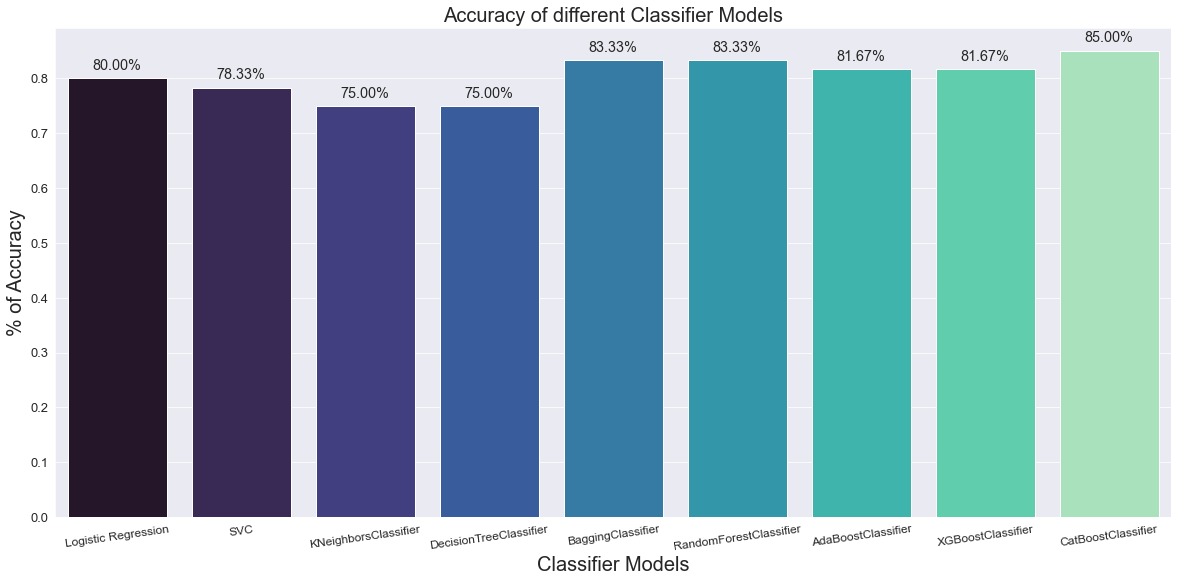

In [44]:
plt.figure(figsize=(20,9))
sns.set_style('darkgrid')
accuracy_df = pd.Series(accuracy_dict)
ax = sns.barplot(x=accuracy_df.index, y=list(accuracy_df), palette = "mako", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()